# K-means clustering

## "Unsupervised" learning - given a set of samples, each with multiple features, try to group the samples together based on similarity.

"K-Means clustering with scikit-learn" by Lorraine Li (towardsdatascience)

"In depth: k-means clustering" by Jake vanderPlas (PythonDataScienceHandbook)

In [1]:
# import standard libraries
import pandas as pd                                    # data frames  
import numpy as np                                     # matrices 
import matplotlib.pyplot as plt                        # plotting 
import seaborn as sns; sns.set()                       # better plotting
from sklearn.model_selection import train_test_split   # training-vs-testing
from sklearn.linear_model import LinearRegression      # the linear regression model
from sklearn import metrics
%matplotlib inline

## follow our usual procedure: make a toy dataset whose properties we know

In [4]:
# create dataset
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples = 150, 
                  n_features = 20,
                  centers = 4,
                  cluster_std = 2, 
                  shuffle=True, 
                  random_state=0)

In [5]:
print(X)

[[ -5.35750516  -7.15319761   2.30688271 ...  -7.39433465  -5.94745047
   -6.8617976 ]
 [ -1.45070626  -2.10693742   2.75928221 ...  -4.20298503  -4.00934433
   -3.93541266]
 [ -6.78762535 -10.23604985   1.82106889 ...  -4.96775991  -4.93561464
   -4.87499478]
 ...
 [  8.97140927   5.27311382  -4.55513654 ...   3.51808715   7.08222213
   -0.28905804]
 [ -1.8772619    2.17030229   2.28825185 ...  -3.1128766   -0.73349679
   -5.34782973]
 [  9.24961977   9.57206889  -0.71539335 ...   1.75170983  10.70940465
    3.52232025]]


In [3]:
# plot

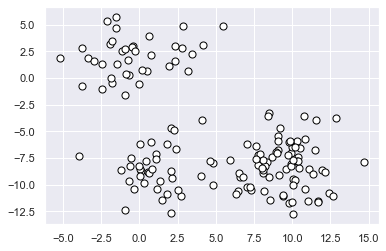

In [6]:
plt.scatter( X[:, 12], X[:, 15], 
            c='white', marker = 'o', edgecolor='black',s=50)

In [9]:
# by construction, there are four groups.

In [7]:
# instantiate a KMeans object.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, 
            init="random", 
            n_init=10, 
            max_iter=300, 
            tol=1e-4, 
            random_state=0)

In [8]:
# make the fit
y_km = km.fit_predict(X)

In [9]:
# these are the predicted clusters
# note that the predictions can be permutations of the initisl cluster ID (0,1,2..n_cluster) and still be correct.
print(y_km)

[3 2 3 0 1 3 2 0 1 0 1 3 3 0 2 3 1 2 2 2 3 1 1 3 2 3 3 0 2 1 0 3 3 1 1 1 1
 1 0 3 1 3 0 0 3 3 3 2 0 1 1 3 2 2 0 2 2 1 0 1 2 0 2 2 2 2 1 1 2 1 0 2 0 0
 2 3 0 3 1 1 3 1 3 1 3 0 2 3 2 0 3 1 0 0 0 3 1 1 0 3 1 0 3 1 1 1 0 0 2 3 1
 1 3 0 0 1 0 2 3 0 0 0 2 3 2 2 0 1 3 2 0 3 3 3 0 2 2 2 2 0 3 2 2 0 1 2 0 1
 2 1]


In [59]:
for y1, y2 in zip(y, y_km):
    print(y1, y2)

3 0
2 1
3 0
0 3
1 2
3 0
2 1
0 3
1 2
0 3
1 2
3 0
3 0
0 3
2 1
3 0
1 2
2 1
2 1
2 1
3 0
1 2
1 2
3 0
2 1
3 0
3 0
0 3
2 1
1 2
0 3
3 0
3 0
1 2
1 2
1 2
1 2
1 2
0 3
3 0
1 2
3 0
0 3
0 3
3 0
3 0
3 0
2 1
0 3
1 2
1 2
3 0
2 1
2 1
0 3
2 1
2 1
1 2
0 3
1 2
2 1
0 3
2 1
2 1
2 1
2 1
1 2
1 2
2 1
1 2
0 3
2 1
0 3
0 3
2 1
3 0
0 3
3 0
1 2
1 2
3 0
1 2
3 0
1 2
3 0
0 3
2 1
3 0
2 1
0 3
3 0
1 2
0 3
0 3
0 3
3 0
1 2
1 2
0 3
3 0
1 2
0 3
3 0
1 2
1 2
1 2
0 3
0 3
2 1
3 0
1 2
1 2
3 0
0 3
0 3
1 2
0 3
2 1
3 0
0 3
0 3
0 3
2 1
3 0
2 1
2 1
0 3
1 2
3 0
2 1
0 3
3 0
3 0
3 0
0 3
2 1
2 1
2 1
2 1
0 3
3 0
2 1
2 1
0 3
1 2
2 1
0 3
1 2
2 1
1 2


In [10]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_km)
print(cm)

[[38  0  0  0]
 [ 0 38  0  0]
 [ 0  0 37  0]
 [ 0  0  0 37]]


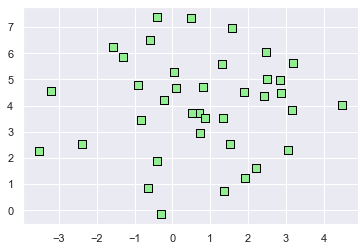

In [11]:
# better visualization: color each group differently
# group km==0, light green squares
plt.scatter( X[y_km ==0, 0], X[y_km ==0, 1], 
            s=50, c='lightgreen', marker = 's', edgecolor='black',label = '0')

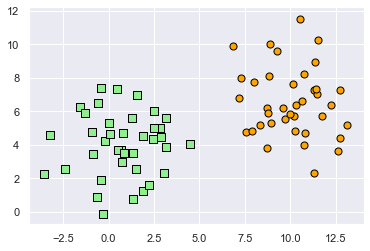

In [12]:
# better visualization: color each group differently
# group km==0, light green squares
plt.scatter( X[y_km ==0, 0], X[y_km ==0, 1], 
            s=50, c='lightgreen', marker = 's', edgecolor='black',label = '0')
# group km==1, orange circles
plt.scatter( X[y_km ==1, 0], X[y_km ==1, 1], 
            s=50, c='orange', marker = 'o', edgecolor='black',label = '1')

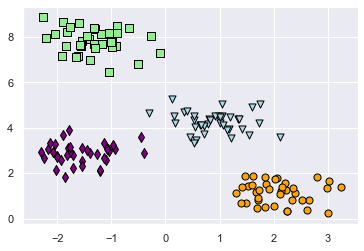

In [39]:
# better visualization: color each group differently
# group km==0, light green squares
plt.scatter( X[y_km ==0, 0], X[y_km ==0, 1], 
            s=50, c='lightgreen', marker = 's', edgecolor='black',label = '0')
# group km==1, orange circles
plt.scatter( X[y_km ==1, 0], X[y_km ==1, 1], 
            s=50, c='orange', marker = 'o', edgecolor='black',label = '1')
# group km==0, light blue triangles
plt.scatter( X[y_km ==2, 0], X[y_km ==2, 1], 
            s=50, c='lightblue', marker = 'v', edgecolor='black',label = '2')
# group km==1, purple diamonds
plt.scatter( X[y_km ==3, 0], X[y_km ==3, 1], 
            s=50, c='purple', marker = 'd', edgecolor='black',label = '3')

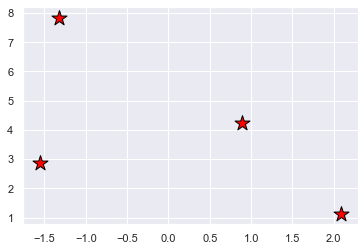

In [40]:
# add the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s = 250, marker = "*", c='red', edgecolor='black', label='centroids')

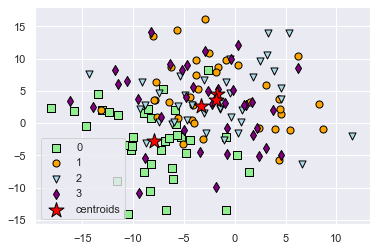

In [63]:
# better visualization: color each group differently
# group km==0, light green squares
first = 9
second = 5
plt.scatter( X[y_km ==0, first], X[y_km ==0, second], 
            s=50, c='lightgreen', marker = 's', edgecolor='black',label = '0')
# group km==1, orange circles
plt.scatter( X[y_km ==1, first], X[y_km ==1, second], 
            s=50, c='orange', marker = 'o', edgecolor='black',label = '1')
# group km==0, light blue triangles
plt.scatter( X[y_km ==2, first], X[y_km ==2, second], 
            s=50, c='lightblue', marker = 'v', edgecolor='black',label = '2')
# group km==1, purple diamonds
plt.scatter( X[y_km ==3, first], X[y_km ==3, second], 
            s=50, c='purple', marker = 'd', edgecolor='black',label = '3')
# add the centroids
plt.scatter(km.cluster_centers_[:,first], km.cluster_centers_[:,second],
           s = 250, marker = "*", c='red', edgecolor='black', label='centroids')
# add legend
plt.legend()
plt.show()

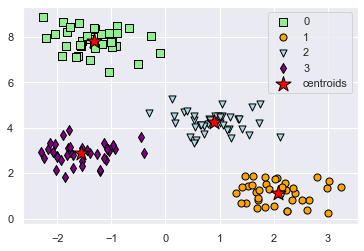

In [42]:
# better visualization: color each group differently
marker_list = ["s","o","v","d"]
color_list = ['lightgreen','orange','lightblue','purple']
for i in range(4):
    plt.scatter( X[y_km ==i, 0], X[y_km ==i, 1], 
                s=50, c=color_list[i], marker = marker_list[i], edgecolor='black',label = i)
# add the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s = 250, marker = "*", c='red', edgecolor='black', label='centroids')
# add legend
plt.legend()
plt.show()

## now do some experiments.  try more diffuse clusters; fewer clusters than centroids, and vice versa

In [71]:
# create dataset
# parameters: 
#              n_samples
#              n_features (dimensionality)
#              centers = number of clusters *in the data* (don't confuse with the KMeans *fit*)
#              cluster_std = 0.5 (how diffuse are the clusters in the data)
                
from sklearn.datasets import make_blobs 
X, y = make_blobs(n_samples = 150, n_features = 2, centers = 6, 
                  cluster_std = 0.3, shuffle=True, random_state=1)

# instantiate a KMeans object.
from sklearn.cluster import KMeans

km = KMeans(n_clusters=6, init="random", 
            n_init=10, max_iter=300, tol=1e-4, random_state=0)

# make the fit
y_km = km.fit_predict(X)

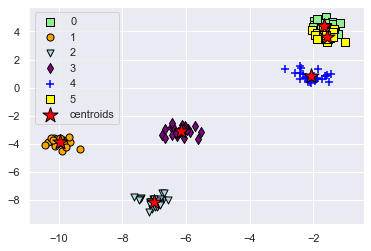

In [72]:
# better visualization: color each group differently
marker_list = ["s","o","v","d","+", "s","o","v","d","+"]
color_list = ['lightgreen','orange','lightblue','purple',"blue","yellow","black"]

for i in range(6):
    plt.scatter( X[y ==i, 0], X[y == i, 1], 
                s=50, c=color_list[i], marker = marker_list[i], edgecolor='black',label = i)
# add the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
           s = 250, marker = "*", c='red', edgecolor='black', label='centroids')
# add legend
plt.legend()
plt.show()

In [73]:
# confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_km)
print(cm)

[[ 0  1  0  0 24  0]
 [ 0  0 25  0  0  0]
 [ 0  0  0 25  0  0]
 [ 0  0  0  0  0 25]
 [25  0  0  0  0  0]
 [ 0 20  0  0  5  0]]


## How many clusters to use? (1) The Elbow Method.

In [ ]:
# "distortion" = total sum of squared distances between each item and its associated centroid.
# less "distortion" means a better fit (kind of like "variance explained")
# note: units and magnitude depend on the units and magnitudes of the features.

<function matplotlib.pyplot.show(*args, **kw)>

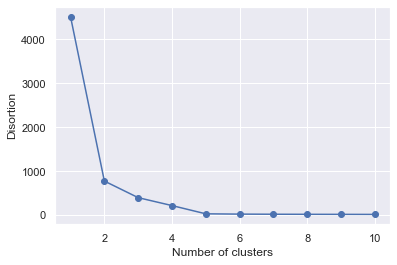

In [77]:
# calculate distortion for a range of n_clusters
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i, n_init = 10, 
                init='random', max_iter = 100, tol=1e-4, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)    # distortion is also called "inertia"

#plot
plt.plot(range(1,11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel("Disortion")
plt.show

## How many clusters to use? (2) The Silhouette Method.

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://en.wikipedia.org/wiki/Silhouette_(clustering)

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


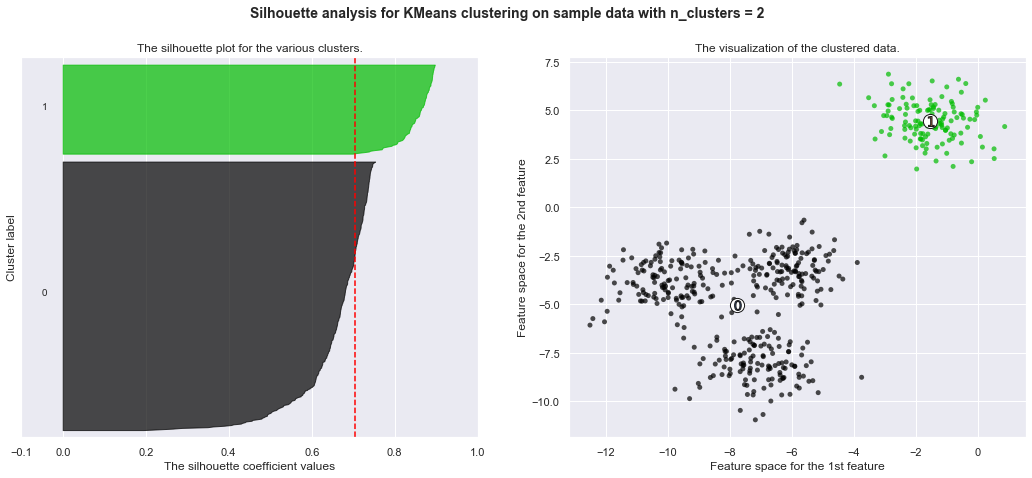

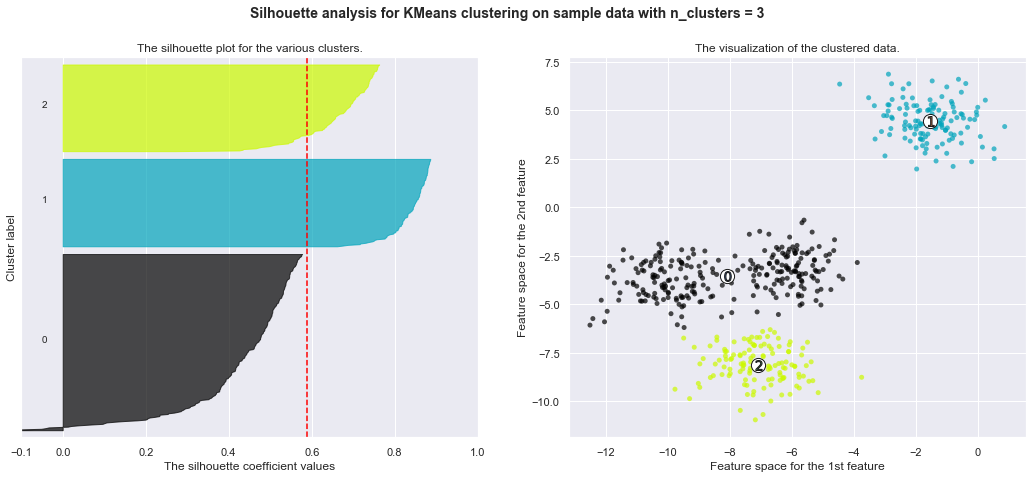

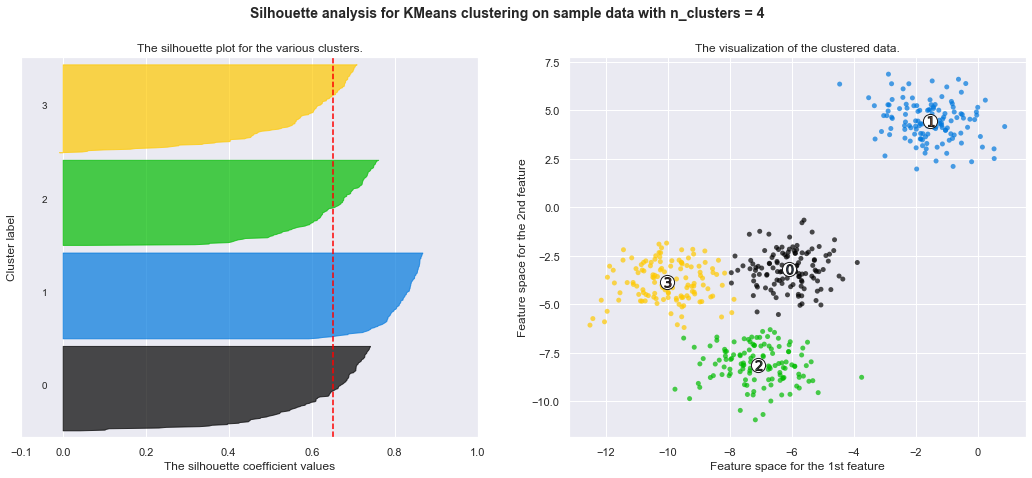

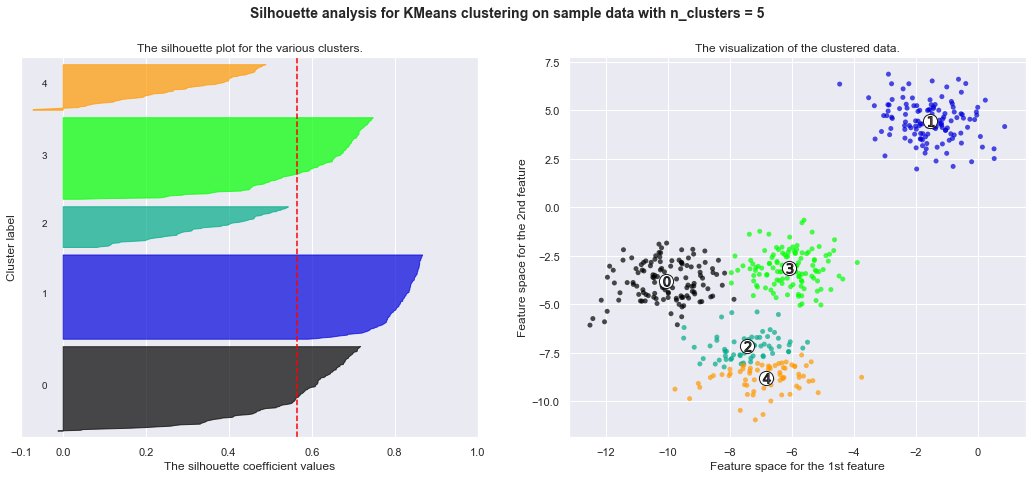

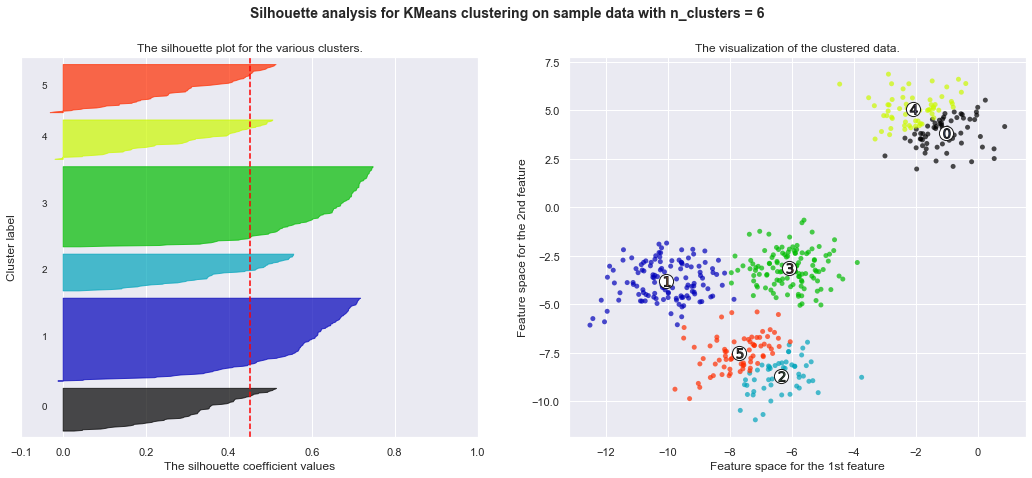

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# make data
X, y = make_blobs(n_samples=500,
                 n_features = 2,
                 centers = 4,
                 center_box = (-10,10),
                  shuffle=True,
                  random_state=1) # for reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,         # put number inside circle!
                    s=100, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Notes on silhouette analysis:
# there may be two cluster-numbers that are both reasonable.  
# Above, it is n_cluster = 2 and n_cluster=4.  In the latter case, one of the two clusters is split into thirds. 

## warning: boundaries between clusters must be linear in the feature space.

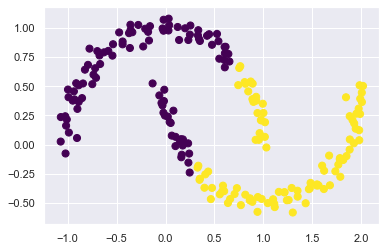

In [81]:
# from vanderPlas:

from sklearn.datasets import make_moons
X, y = make_moons(200, noise=0.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], s=50, c=labels, cmap='viridis')

## One solution (out of many!)

Spectral Clustering:
* find nearest-neighbors in the feature space
* use this connectivity graph to define a higher-dimensional representation of the data (here, more than 2 features)
* do kMeans in this higher dimensional space.

/Users/drokhsar/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


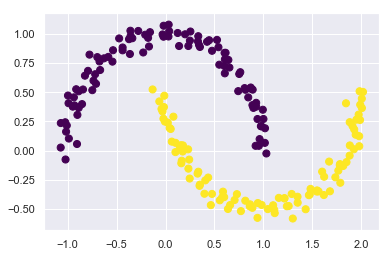

In [54]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity="nearest_neighbors", 
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], s=50, c=labels, cmap='viridis')

## our workhorse: digits

In [55]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [57]:
kmeans = KMeans(n_clusters=10, random_state=0)  # this is almost the minimum specification!
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [58]:
# there are ten clusters (by definition)
# each cluster is a 64-dimensional set of features (the pixels)
# what do the centroids look like?

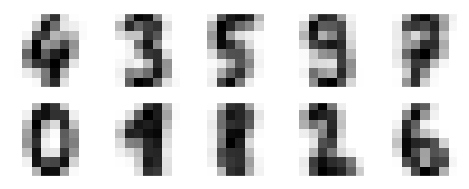

In [60]:
fix, ax = plt.subplots(2,5, figsize=(8,3))
centers = kmeans.cluster_centers_.reshape(10,8,8)   #turn from a flat 64-dimensional vector into 8x8
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [62]:
# note: "8" is not particularly distinctive.  

# since these data are labeled, we can use the most common ("modal") label of each cluster.
from scipy.stats import mode

labels = np.zeros_like(clusters)     # initially make labels a vector of zeros the same size a the number of clusters
for i in range(10):
    mask = clusters == i             # mark all the images in cluster i to be "True"
    labels[mask] = mode(digits.target[mask])[0]     # compute the mode of the "target" labels in cluster i.

In [63]:
mask

array([False, False, False, ..., False, False, False])

In [64]:
#Check the accuracy from unsupervised learning
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [68]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
print(mat)

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 163   0   0   7   4   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   4   2   5 100  53]
 [  0  20   0   6   0   6   0   7   2 139]]


Text(89.18, 0.5, 'predicted label')

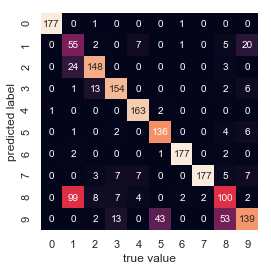

In [70]:
# visualize nicely
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False,
           xticklabels = digits.target_names,
           yticklabels = digits.target_names)
plt.xlabel('true value')
plt.ylabel('predicted label')

In [ ]:
# so true value of 1 is often mis-predicted as 8; true value of 5 and 8 are often mis-predicted as 9.

# we will return to this later when we try other clustering methods.  
# But for now you could try to use more than 10 clusters.  Maybe there are different sub-types of 8 and 1?

Datasets to practice with

# iris dataset (petal and sepal dimensions)

# https://www.kaggle.com/uciml/zoo-animal-classification